In [1]:
%matplotlib inline

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split

In [10]:
for chunk in pd.read_csv('../05.Support Vector Machines/data/pulsar_stars.csv', chunksize=1000, sep=', '):
    print(chunk)
    break

                        Mean of the integrated profile  \
0    140.5625,55.68378214,-0.234571412,-0.699648398...   
1    102.5078125,58.88243001,0.465318154,-0.5150879...   
2    103.015625,39.34164944,0.323328365,1.051164429...   
3    136.75,57.17844874,-0.068414638,-0.636238369,3...   
4    88.7265625,40.67222541,0.600866079,1.123491692...   
..                                                 ...   
995  110.5546875,47.45652757,0.186282182,-0.1836848...   
996  111.2890625,57.13349941,0.419450497,-0.4666724...   
997  108.8359375,45.50150707,0.316584357,0.13345715...   
998  128.5546875,37.17290861,0.050927627,1.09058168...   
999  103.8828125,45.0329083,0.192327364,0.120666743...   

     Standard deviation of the integrated profile  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                     

C:\Users\Master\AppData\Local\Temp\ipykernel_4852\648937033.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  for chunk in pd.read_csv('../05.Support Vector Machines/data/pulsar_stars.csv', chunksize=1000, sep=', '):


In [53]:
attr, clusters = make_blobs(n_samples=1000)

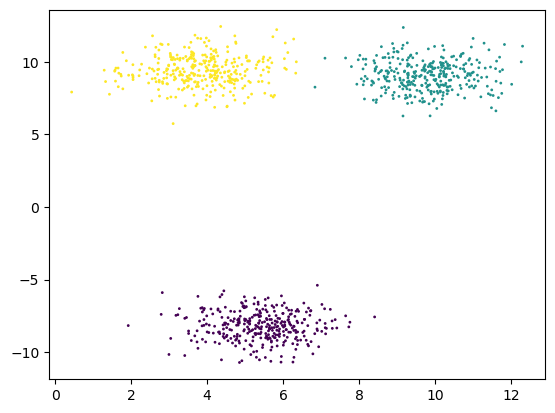

In [54]:
plt.scatter(attr[:, 0], attr[:, 1], c=clusters, s=1)
plt.show()

In [55]:
X_trn, X_tst, y_trn, y_tst = train_test_split(attr, clusters, test_size=0.1, stratify=clusters)

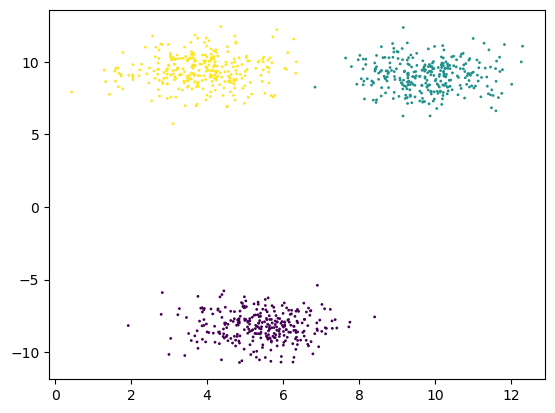

In [56]:
plt.scatter(X_trn[:, 0], X_trn[:, 1], c=y_trn, s=1)
plt.show()

In [57]:
k_means = KMeans(n_clusters=3, init='random')

In [58]:
k_means.fit(X_trn)

KMeans(init='random', n_clusters=3)

In [61]:
trn_pred = k_means.predict(X_trn)

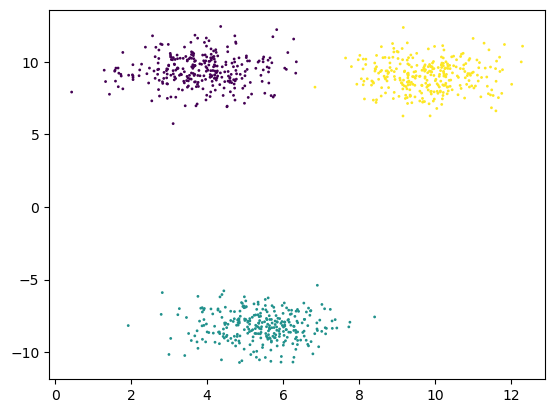

In [62]:
plt.scatter(X_trn[:, 0], X_trn[:, 1], c=trn_pred, s=1)
plt.show()

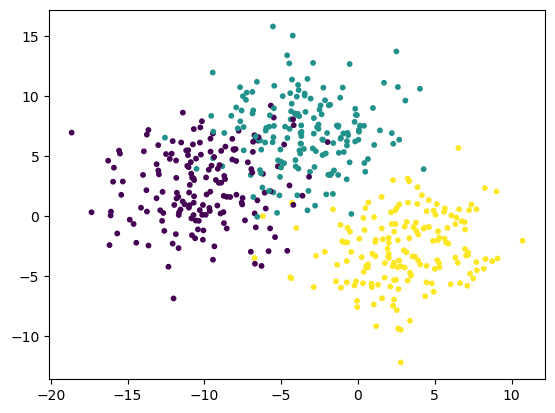

In [63]:
# data that is simililar
attr, clusters = make_blobs(n_samples=500, cluster_std=3)
plt.scatter(attr[:, 0], attr[:, 1], c=clusters, s=10)
plt.show()

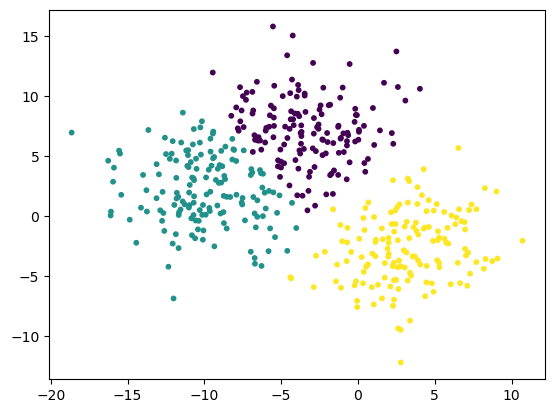

In [64]:
X_trn, X_tst, y_trn, y_tst = train_test_split(attr, clusters, test_size=0.1, stratify=clusters)
k_means.fit(X_trn)
trn_pred = k_means.predict(X_trn)
plt.scatter(X_trn[:, 0], X_trn[:, 1], c=trn_pred, s=10)
plt.show()

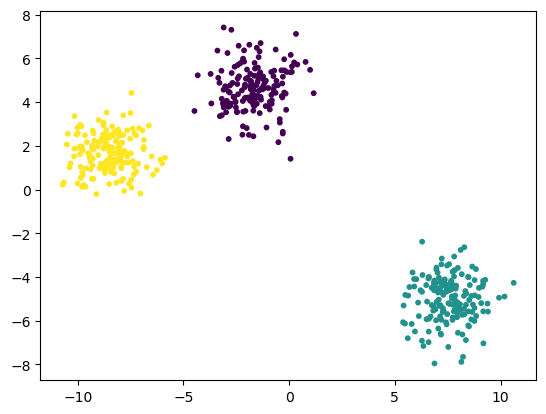

In [84]:
# modifying data, skewing it using std dev
attr, clusters = make_blobs(n_samples=500)
plt.scatter(attr[:, 0], attr[:, 1], c=clusters, s=10)
plt.show()

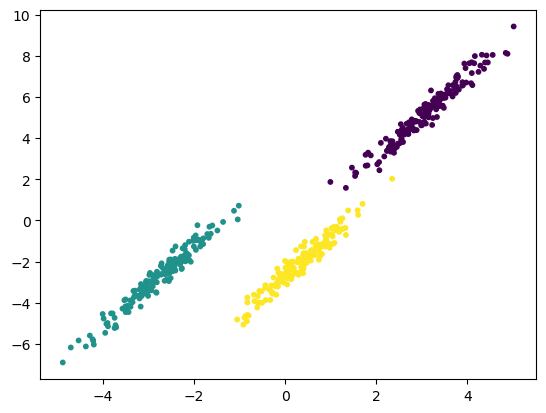

In [120]:
attr_skew = attr @ np.array([
    [0.1, 0.5],
    [0.7, 1.3]
])
plt.scatter(attr_skew[:, 0], attr_skew[:, 1], c=clusters, s=10)
plt.show()

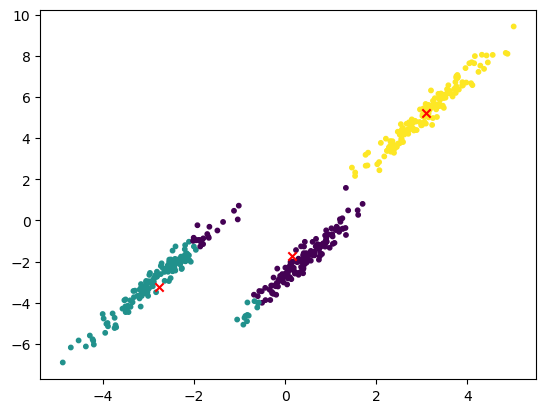

In [125]:
# with this eliptica clusters, kmeans might have problem
# clearly visible that the shape of the clusters is not taken into account by kmeans
X_trn, X_tst, y_trn, y_tst = train_test_split(attr_skew, clusters, test_size=0.1, stratify=clusters)
k_means.fit(X_trn)
cluster_centers = k_means.cluster_centers_
trn_pred = k_means.predict(X_trn)
plt.scatter(X_trn[:, 0], X_trn[:, 1], c=trn_pred, s=10)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r', marker='x')
plt.show()

In [131]:
# Inertia evaluation
attr, clusters = make_blobs(n_samples=500)
data = {
    'n_clusters': [],
    'inertias': []
}

for n_clusters in range(1, 11):
    k_means = KMeans(n_clusters=n_clusters)
    k_means.fit(attr)
    data['n_clusters'].append(n_clusters)
    data['inertias'].append(k_means.inertia_)

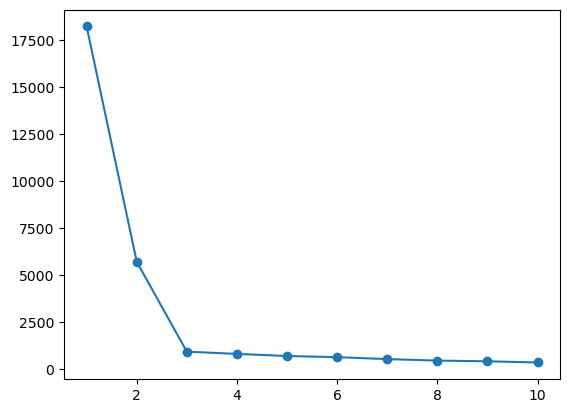

In [134]:
data = pd.DataFrame(data)
plt.scatter(data.n_clusters, data.inertias)
plt.plot(data['n_clusters'], data['inertias'])
plt.show()

In [135]:
# checking diff between the values
data.inertias.diff()

0             NaN
1   -12512.812239
2    -4778.486498
3     -120.056107
4     -110.581555
5      -62.569611
6     -102.046289
7      -80.410650
8      -37.486802
9      -62.315326
Name: inertias, dtype: float64

In [137]:
agg = AgglomerativeClustering(n_clusters=3)

In [145]:
agg.fit(attr)

AgglomerativeClustering(n_clusters=3)

In [144]:
agg(attr)

array([2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1,
       1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2,
       1, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0,